## Data Loading And Exploration

In [1]:
# importing necessar libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data Directly from the raw link
ds=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv",header=None)

In [3]:
ds

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


This Dataset contain 614 rows and 13 columns. Column names are not present in this we have to do that manually.This is a binary classification problem.

In [4]:
# Writing Column Names as given in problem statement
col_names=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Applicant_Income','CoApplicant_Income','Loan_Amount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
ds.columns=col_names

In [6]:
ds.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
602,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
133,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y


In [7]:
# Checking for missing values
ds.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
CoApplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

There is presence of missing values in features named Gender,Married,Dependents,Self_Employed,Loan_amount,Loan_Amount_Term,Credit_History.

In [8]:
unique_counts = ds.nunique()

print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
Loan_ID               614
Gender                  2
Married                 2
Dependents              4
Education               2
Self_Employed           2
Applicant_Income      505
CoApplicant_Income    287
Loan_Amount           203
Loan_Amount_Term       10
Credit_History          2
Property_Area           3
Loan_Status             2
dtype: int64


In [9]:
# Dropping Load_Id as it is not important for the analysis
ds.drop("Loan_ID",axis=1,inplace=True)

In [10]:
ds.shape

(614, 12)

Now, We have 614 rows and 12 columns.

In [11]:
# Checking datatypes of the features
ds.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
CoApplicant_Income    float64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
dtype: object

Many of the columns have object datatype .

In [12]:
# Filling missing values in 'Gender' with the mode
ds['Gender'].fillna(ds['Gender'].mode()[0], inplace=True)

# Filling missing values in 'Married' with the mode
ds['Married'].fillna(ds['Married'].mode()[0], inplace=True)

# Filling missing values in 'Dependents' with the mode
ds['Dependents'].fillna(ds['Dependents'].mode()[0], inplace=True)

# Filling missing values in 'Self_Employed' with the mode
ds['Self_Employed'].fillna(ds['Self_Employed'].mode()[0], inplace=True)

# Filling missing values in 'Loan_Amount' with the median
ds['Loan_Amount'].fillna(ds['Loan_Amount'].median(), inplace=True)

# Filling missing values in 'Loan_Amount_Term' with the median
ds['Loan_Amount_Term'].fillna(ds['Loan_Amount_Term'].median(), inplace=True)

# Filling missing values in 'Credit_History' with the mode
ds['Credit_History'].fillna(ds['Credit_History'].mode()[0], inplace=True)

# Displaying the dataframe to verify
print(ds.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
CoApplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


We have successfully handled missing values without losing any data.

## Data Visulization

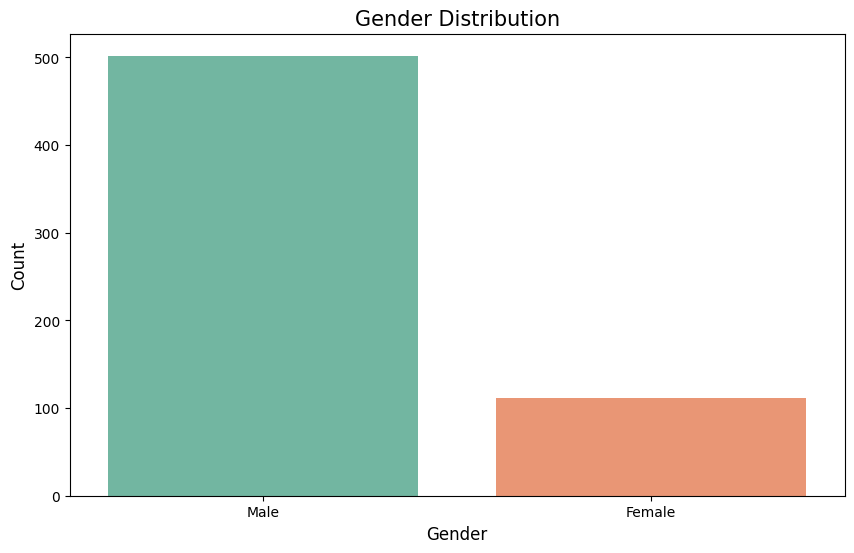

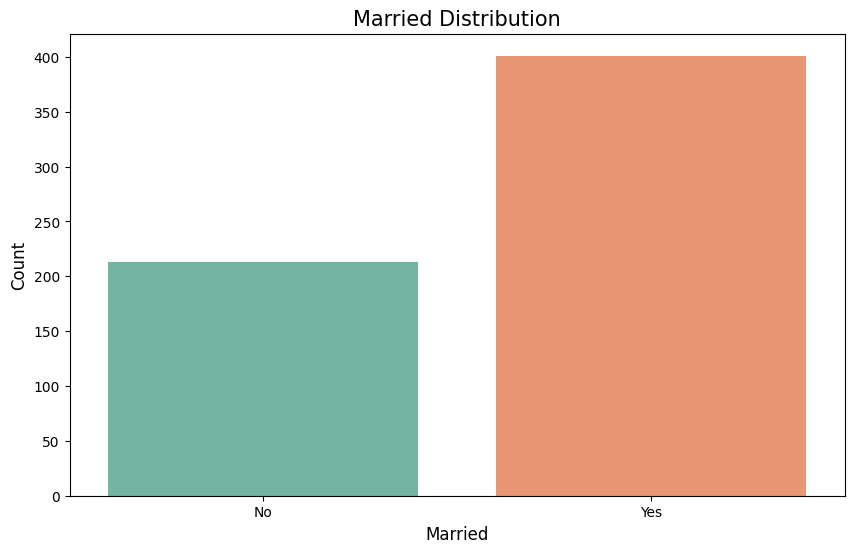

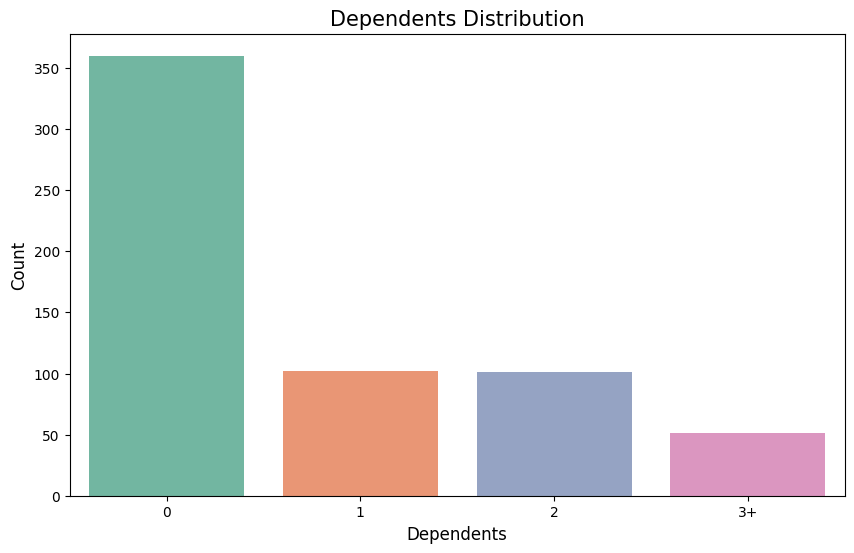

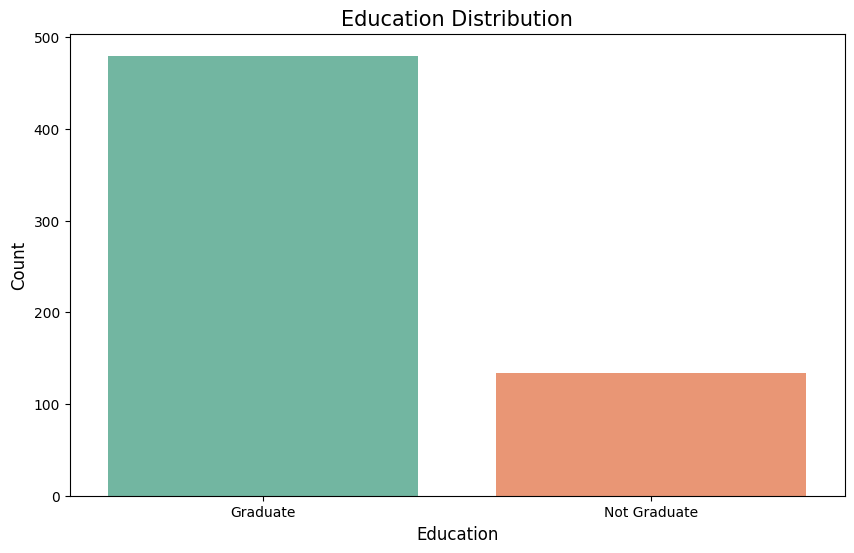

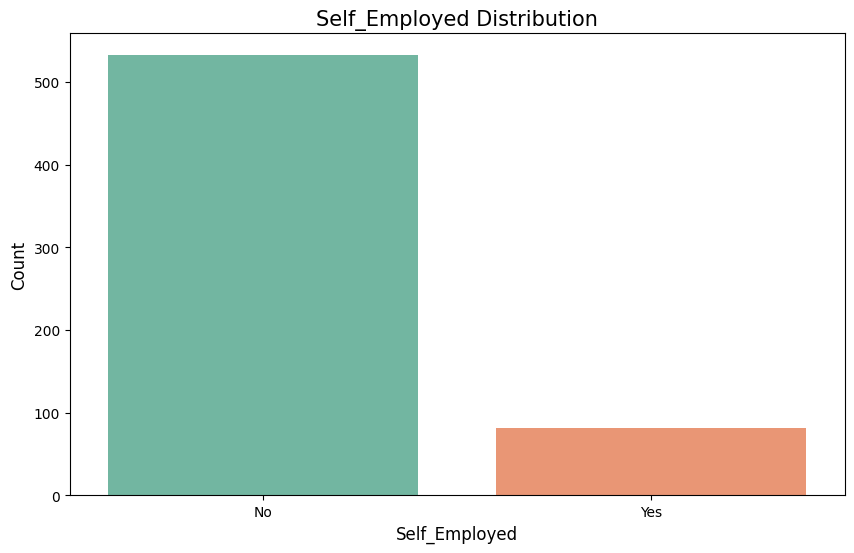

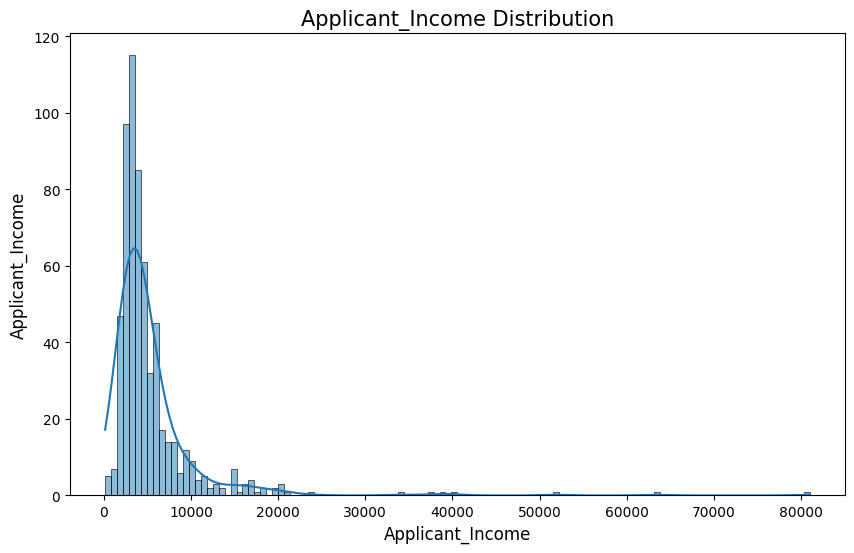

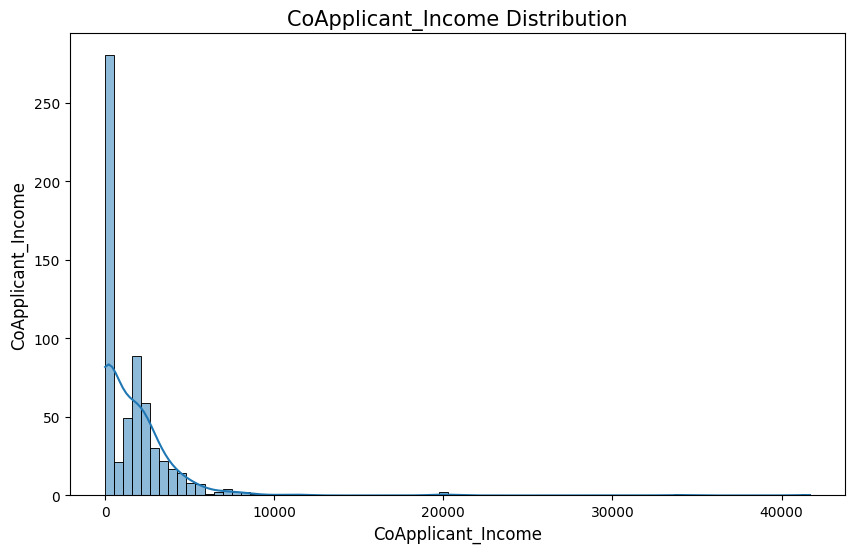

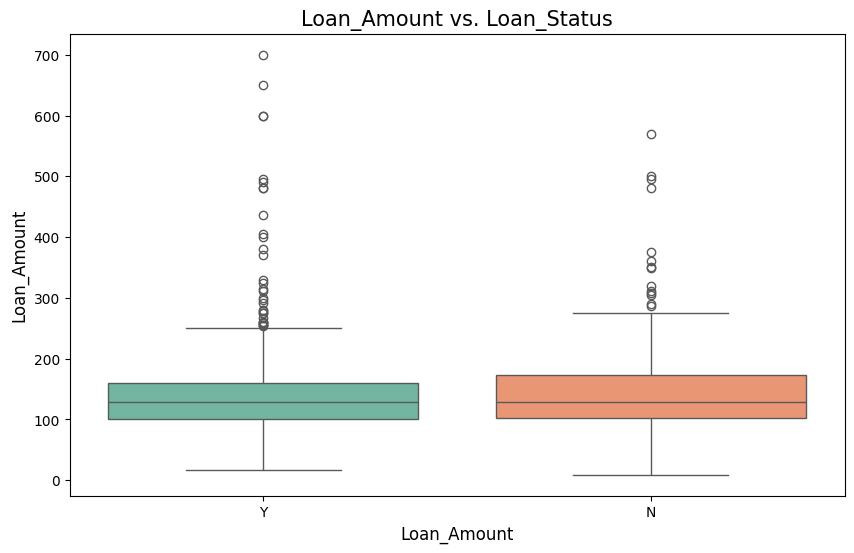

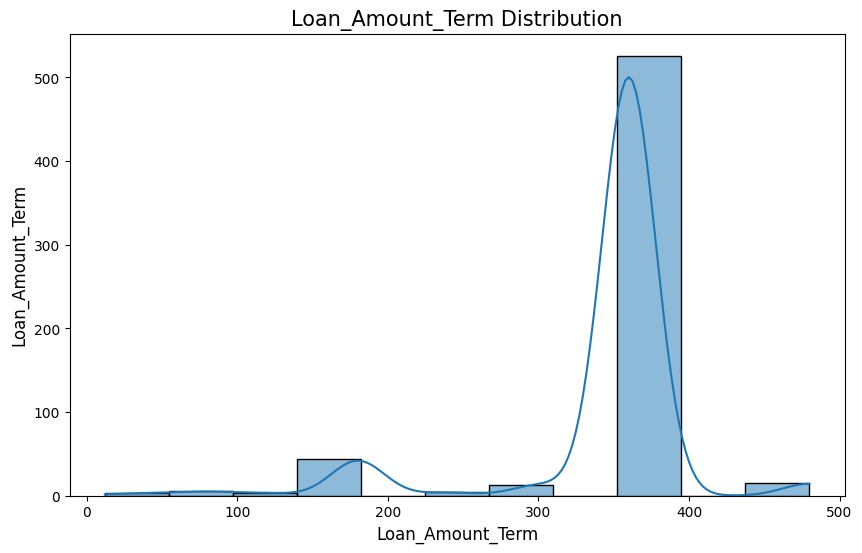

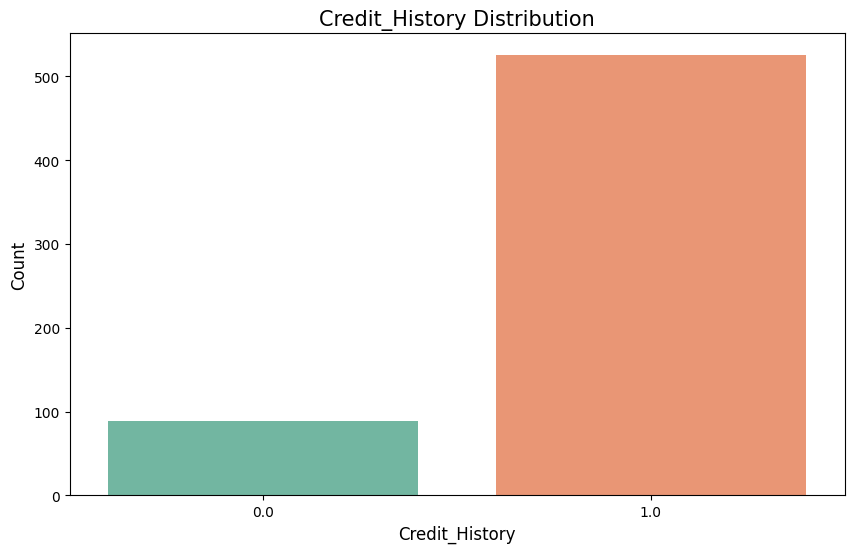

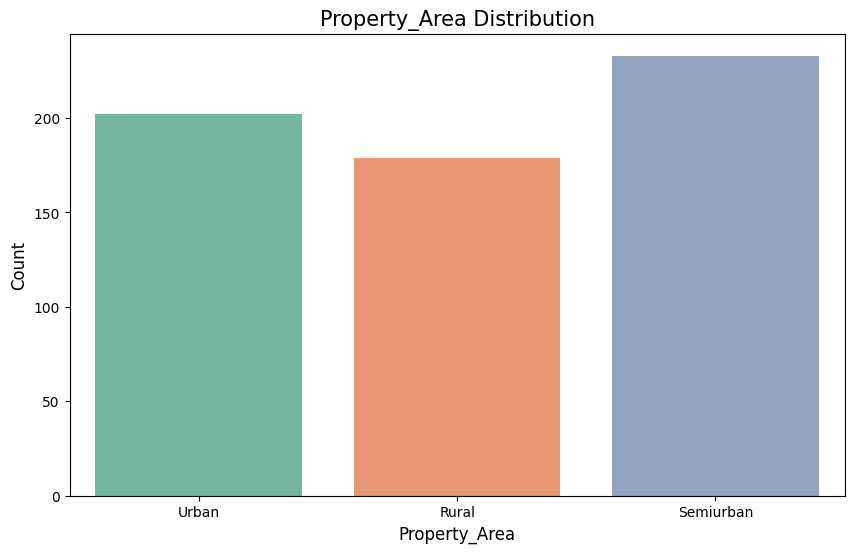

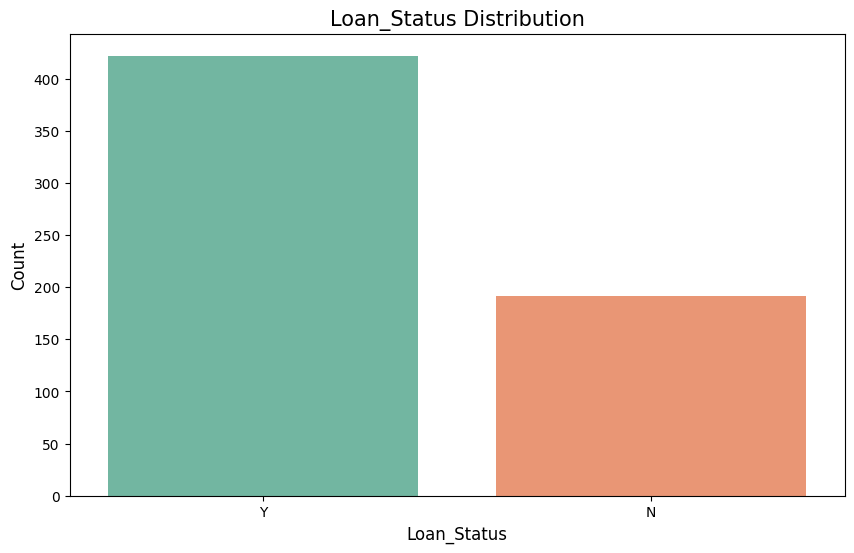

In [13]:
# Defining columns and plot types
plots = [
    ('Gender', 'countplot'),
    ('Married', 'countplot'),
    ('Dependents', 'countplot'),
    ('Education', 'countplot'),
    ('Self_Employed', 'countplot'),
    ('Applicant_Income', 'histplot'),
    ('CoApplicant_Income', 'histplot'),
    ('Loan_Amount', 'boxplot', 'Loan_Status'),
    ('Loan_Amount_Term', 'histplot'),
    ('Credit_History', 'countplot'),
    ('Property_Area', 'countplot'),
    ('Loan_Status', 'countplot')
]

# Creating plots 
for plot in plots:
    plt.figure(figsize=(10, 6))
    palette = sns.color_palette("viridis", as_cmap=True) if plot[1] == 'histplot' else sns.color_palette("Set2")
    if plot[1] == 'countplot':
        sns.countplot(x=plot[0], data=ds, palette=palette)
        plt.title(f'{plot[0]} Distribution', fontsize=15)
    elif plot[1] == 'histplot':
        sns.histplot(ds[plot[0]], kde=True, palette=palette)
        plt.title(f'{plot[0]} Distribution', fontsize=15)
    elif plot[1] == 'boxplot':
        sns.boxplot(x=plot[2], y=plot[0], data=ds, palette=palette)
        plt.title(f'{plot[0]} vs. {plot[2]}', fontsize=15)
    plt.xlabel(plot[0], fontsize=12)
    plt.ylabel('Count' if plot[1] == 'countplot' else plot[0], fontsize=12)
    plt.show()

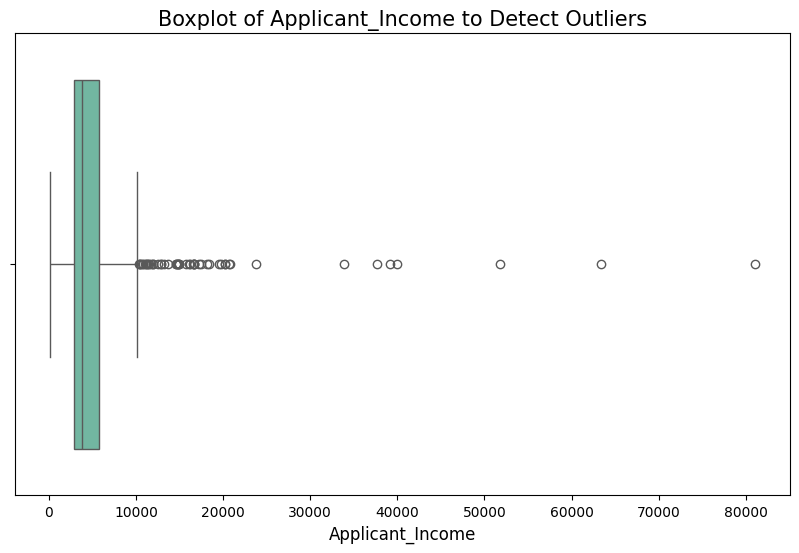

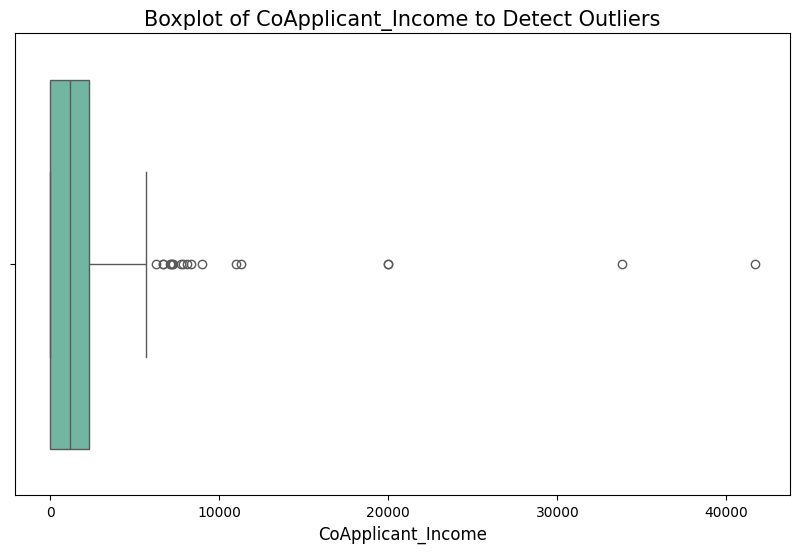

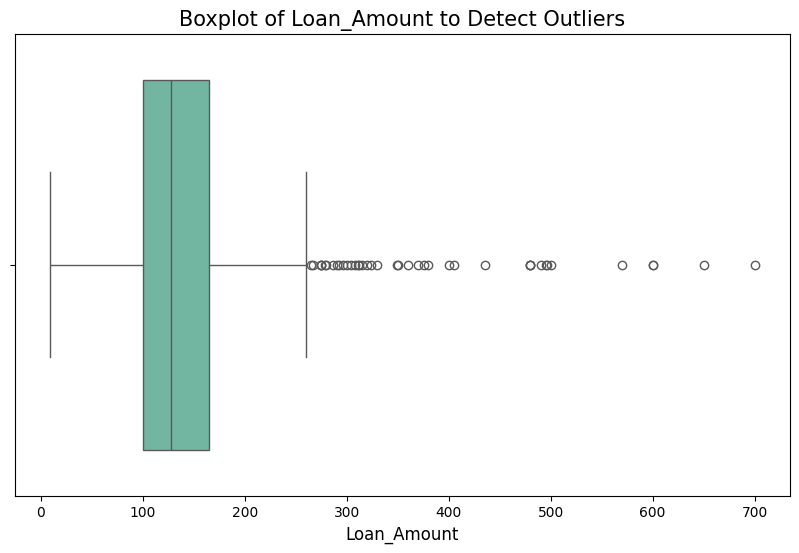

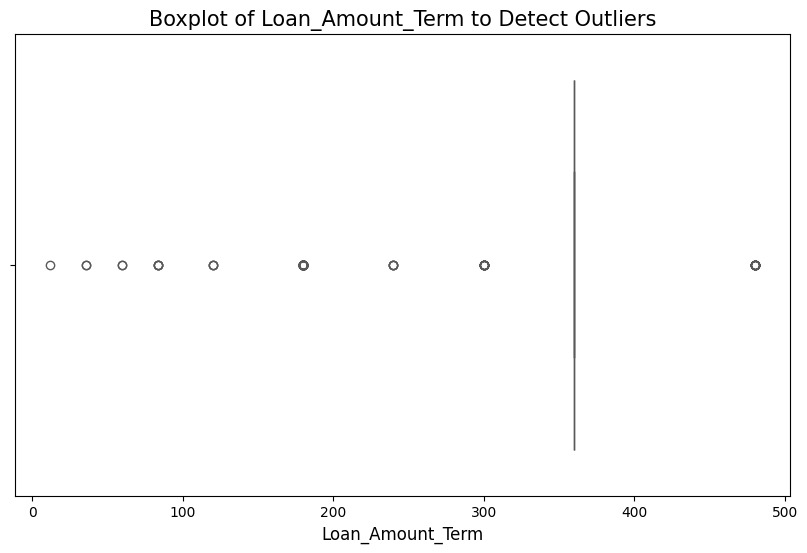

In [14]:
# Defining continuous columns for outlier detection
continuous_columns = ['Applicant_Income', 'CoApplicant_Income', 'Loan_Amount', 'Loan_Amount_Term']

# Creating boxplots to detect outliers
for column in continuous_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=ds[column], palette="Set2")
    plt.title(f'Boxplot of {column} to Detect Outliers', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.show()

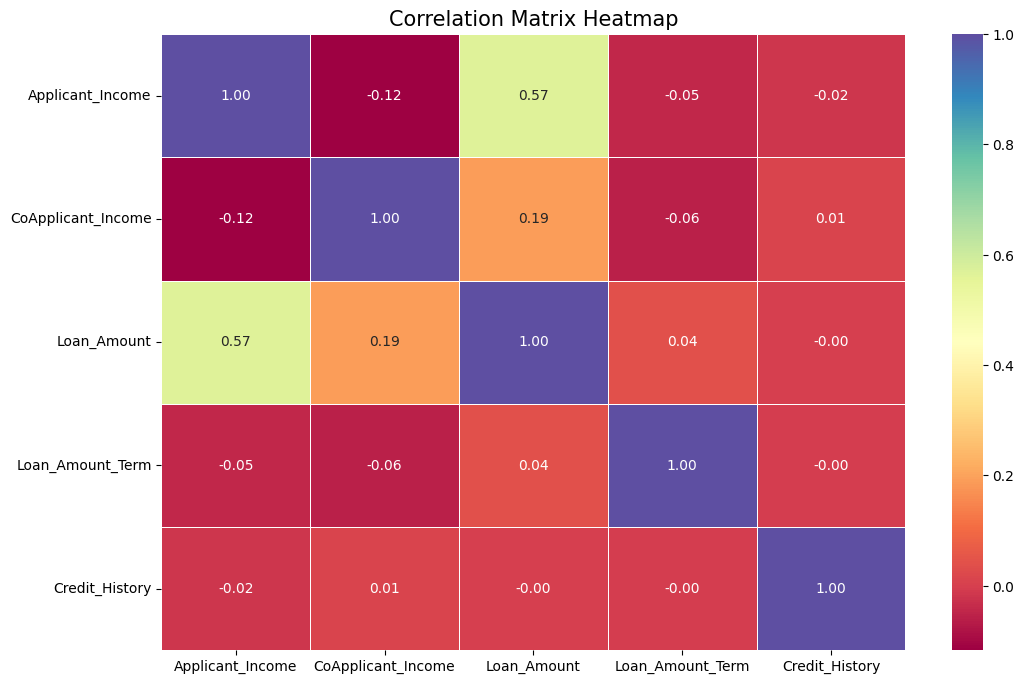

In [15]:
# Calculating the correlation matrix
correlation_matrix = ds.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Spectral', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=15)
plt.show()

In [16]:
# Summary Statistics
ds.describe()

,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [17]:
from sklearn.preprocessing import LabelEncoder

# Identifying object columns
object_columns = ds.select_dtypes(include='object').columns
print("Object Columns:", object_columns)

# Initializing the label encoder
label_encoder = LabelEncoder()

# Converting each object column to integers
for column in object_columns:
    ds[column] = label_encoder.fit_transform(ds[column].astype(str))

# Checking the data types to confirm conversion
print(ds.dtypes)

Object Columns: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')
Gender                  int32
Married                 int32
Dependents              int32
Education               int32
Self_Employed           int32
Applicant_Income        int64
CoApplicant_Income    float64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area           int32
Loan_Status             int32
dtype: object


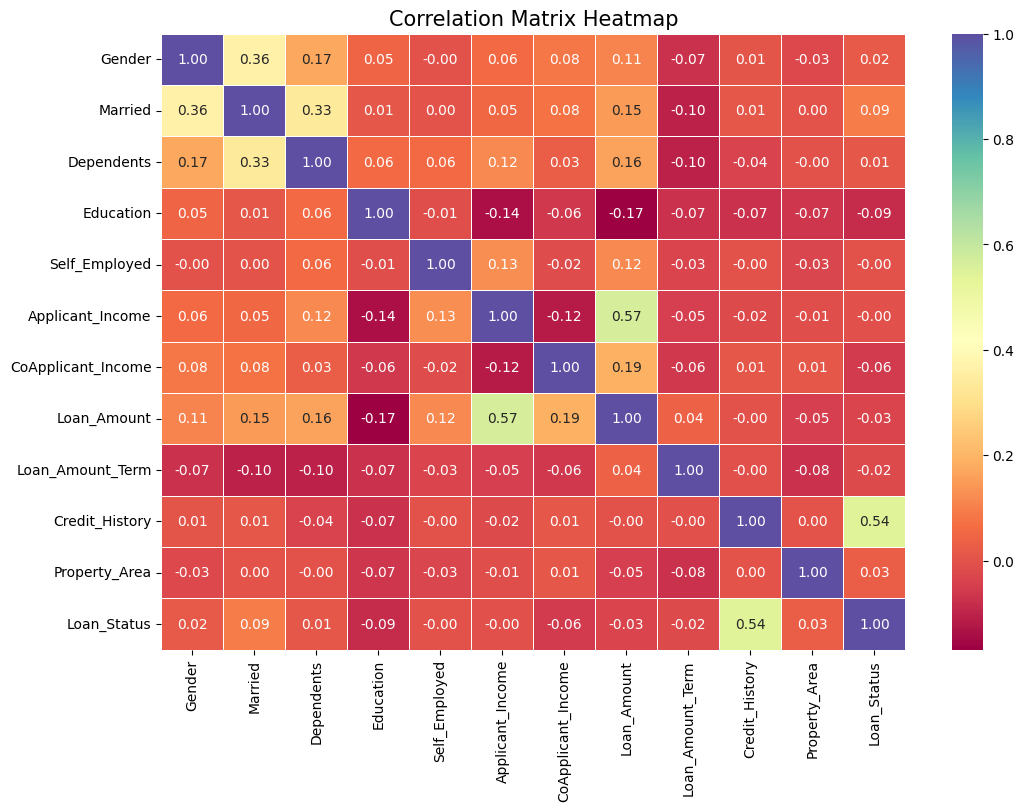

In [18]:
# Calculating the correlation matrix
correlation_matrix = ds.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Spectral', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=15)
plt.show()

### Skewness Handling

In [19]:
ds.skew()

Gender               -1.648795
Married              -0.644850
Dependents            1.015551
Education             1.367622
Self_Employed         2.159796
Applicant_Income      6.539513
CoApplicant_Income    7.491531
Loan_Amount           2.743053
Loan_Amount_Term     -2.402112
Credit_History       -2.021971
Property_Area        -0.066196
Loan_Status          -0.809998
dtype: float64

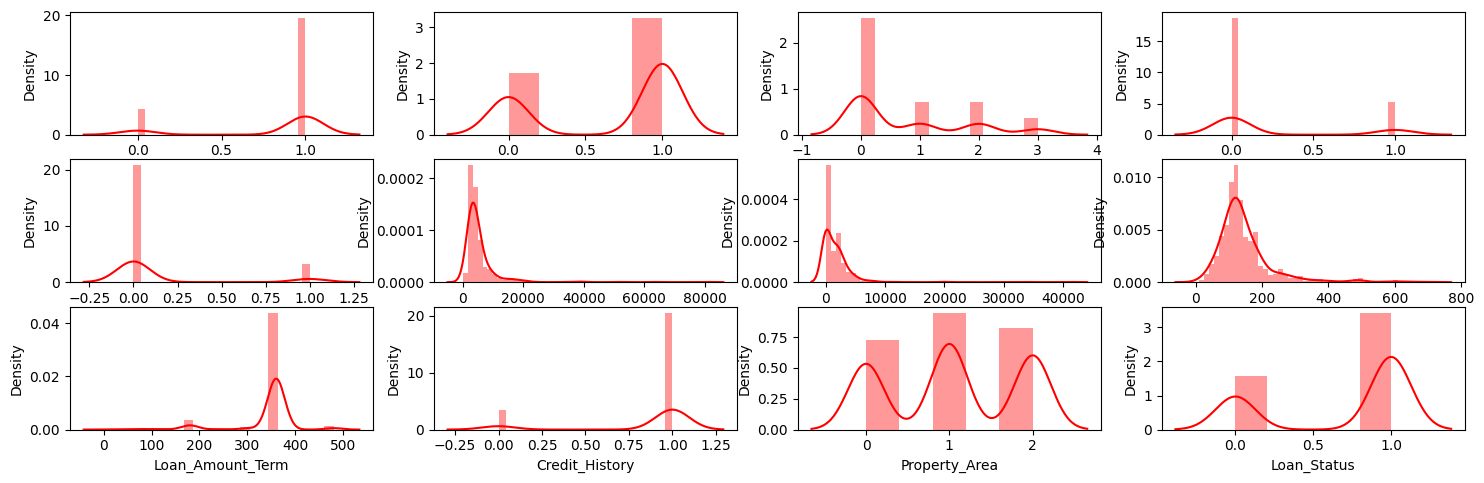

In [20]:
plt.figure(figsize=(18,15))
for i in enumerate(ds.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(ds[i[1]],color='r')

In [21]:
from scipy.stats import skew, boxcox
# Calculating skewness
numeric_cols = ds.select_dtypes(include=[np.number]).columns
skewness = ds[numeric_cols].apply(lambda x: skew(x.dropna()))

# Identifying columns with skewness greater than threshold
skewed_cols = skewness[abs(skewness) > 0.75].index

# Applying appropriate transformations
for col in skewed_cols:
    if col == 'Applicant_Income' or col == 'CoApplicant_Income':
        ds[col] = np.log1p(ds[col])  
    elif col == 'Loan_Amount' or col == 'Loan_Amount_Term':
        ds[col], _ = boxcox(ds[col] + 1)  

# Re-calculating skewness after transformation
skewness_after = ds[skewed_cols].apply(lambda x: skew(x.dropna()))
print("Skewness after transformation:\n", skewness_after)

Skewness after transformation:
 Gender               -1.644765
Dependents            1.013068
Education             1.364279
Self_Employed         2.154516
Applicant_Income      0.480949
CoApplicant_Income   -0.172650
Loan_Amount           0.020780
Loan_Amount_Term      0.391612
Credit_History       -2.017028
Loan_Status          -0.808018
dtype: float64


### Outliers Removal

In [22]:
# Function to remove outliers using IQR method
def remove_outliers(ds, cols):
    Q1 = ds[cols].quantile(0.25)
    Q3 = ds[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = ds[~((ds[cols] < lower_bound) | (ds[cols] > upper_bound)).any(axis=1)]
    return df

# Columns to consider for outlier removal
cols_to_check = ['Applicant_Income', 'CoApplicant_Income', 'Loan_Amount', 'Loan_Amount_Term']

# Removing outliers
df = remove_outliers(ds, cols_to_check)

# Check how many rows were removed
rows_removed = len(ds) - len(df)
print(f"Removed {rows_removed} rows due to outliers.")


Removed 127 rows due to outliers.


In [23]:
df.shape

(487, 12)

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674197,0.000000,5.523234,1.818206e+07,1.0,2,1
1,1,1,1,0,0,8.430327,7.319202,5.523234,1.818206e+07,1.0,0,0
2,1,1,0,0,1,8.006701,0.000000,4.695525,1.818206e+07,1.0,2,1
3,1,1,0,1,0,7.857094,7.765993,5.441107,1.818206e+07,1.0,2,1
4,1,0,0,0,0,8.699681,0.000000,5.646911,1.818206e+07,1.0,2,1


In [25]:
# Separating input and target variable
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

### Treating class imbalance

In [26]:
# Checking class distribution
print("Class distribution before SMOTE:")
print(y.value_counts())

Class distribution before SMOTE:
1    342
0    145
Name: Loan_Status, dtype: int64


In [27]:
from imblearn.over_sampling import SMOTE
# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X,Y = smote.fit_resample(x, y)

In [28]:
# Checking class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(Y).value_counts())

Class distribution after SMOTE:
1    342
0    342
Name: Loan_Status, dtype: int64


Successfully made the class distribution balanced

### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(547, 11)
(137, 11)
(547,)
(137,)


### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy Score 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Evaluating model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.4015
Classification Report:
              precision    recall  f1-score   support

           0       0.40      1.00      0.57        55
           1       0.00      0.00      0.00        82

    accuracy                           0.40       137
   macro avg       0.20      0.50      0.29       137
weighted avg       0.16      0.40      0.23       137

Confusion Matrix:
[[55  0]
 [82  0]]


### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rmodel = RandomForestClassifier(random_state=42)
rmodel.fit(X_train, y_train)

# Predictions
y_pred = rmodel.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Print other evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8029

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76        55
           1       0.84      0.83      0.83        82

    accuracy                           0.80       137
   macro avg       0.79      0.80      0.80       137
weighted avg       0.80      0.80      0.80       137


Confusion Matrix:
[[42 13]
 [14 68]]


### Hyperparameter Tuning

In [35]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [36]:
rmodel = RandomForestClassifier(random_state=42)

# Defining the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],  
    'max_features': ['auto', 'sqrt', 'log2'], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
    'bootstrap': [True, False] 
}

random_search = RandomizedSearchCV(estimator=rmodel, param_distributions=param_grid, n_iter=50,
                                   scoring='accuracy', cv=5, verbose=1, random_state=42, n_jobs=-1)

# Performing RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Best parameters found during the search
print("Best Parameters:")
print(random_search.best_params_)

# Predictions using the best estimator
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculating accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters:
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}
Accuracy Score: 0.8029

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76        55
           1       0.84      0.83      0.83        82

    accuracy                           0.80       137
   macro avg       0.79      0.80      0.80       137
weighted avg       0.80      0.80      0.80       137


Confusion Matrix:
[[42 13]
 [14 68]]


There is not much difference in accuracy even after hyperparameter tuning. Now let's save the random forest model because it is giving the higher accuracy than Logistic Regression.

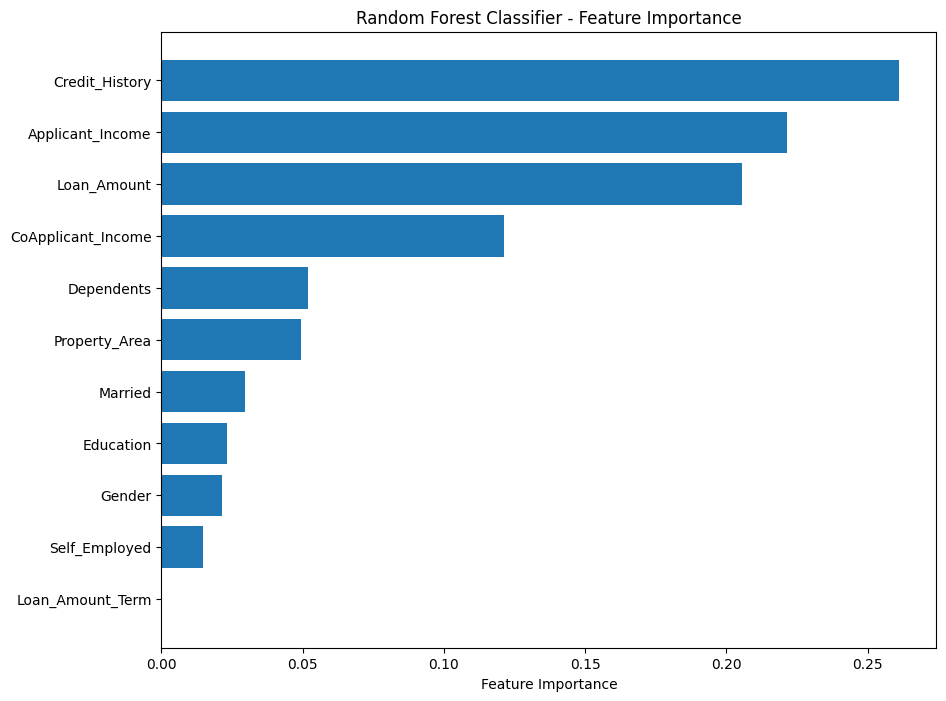

In [38]:
# Feature importance plot
feature_importances = best_model.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()

### Saving the Model

In [37]:
import joblib
# Save the model to a file
filename = 'random_forest_model.pkl'
joblib.dump(rmodel, filename)

print(f"Model saved as {filename}")

Model saved as random_forest_model.pkl


**Loan Status Prediction Project Documentation**

Problem Statement
The project aims to predict whether a loan application will be approved based on applicant details like income, credit history, and demographics.

Dataset
Source: Data was sourced from GitHub.
Features: Includes applicant demographics, income details, loan amount, credit history, and property area.
Target Variable: Loan_Status indicating approval (Y) or rejection (N).
    
Methodology
Data Preprocessing:
Handled missing values and converted categorical variables to numerical using encoding.
Addressed outliers and skewness in numerical features.
Balanced class distribution using SMOTE due to imbalance in loan approval statuses.

Model Selection and Tuning:
Implemented Random Forest Classifier for its robustness and feature importance analysis capabilities.
Tuned hyperparameters (n_estimators, max_depth, etc.) using RandomizedSearchCV for optimal performance.

Model Evaluation:
Assessed model performance using accuracy score and other metrics suitable for binary classification.

Results
Achieved an accuracy score of 0.8029 on the test set post-tuning.
Identified key features influencing loan approval decisions.

Conclusion
Successfully developed a predictive model for loan approval with effective preprocessing and model tuning.